In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import matplotlib as matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

## 1. 실적 데이터 만들기

In [163]:
tk = pd.DataFrame({
    "2022_4Q" : [234, -96, -84, 100, 771, 491.3, 226.2, 59.9],
    "2022_3Q" : [200, -67, 52, 92, 788, 195, 107, 45.6],
    "2022_2Q" : [146, -23, -2, 96, 815, 223.3, 121.5, 36.4],
    "2022_1Q" : [273, 46, 68, 98, 826, 439, 202, 28.1],
    "2021_4Q" : [220, 11, 41, 100, 840, 199.7, 104.2, 23.0 ],
    "2021_3Q" : [127, -39, 1, 100, 840, 85, 50, 24.2],
    "2021_2Q" : [2, -41, 3, 103, 874, 0, 0, 0],
    "2021_1Q" : [3, -42, 10, 107, 905, 0, 0, 0],
    "2020_4Q" : [0, -72, -23, 107, 905, 11.4, 7.3, 16.6],
    "2020_3Q" : [11, -80, -21, 107, 905, 8.6, 6.7, 17.6],
    "2020_2Q" : [0, -16, 49, 108, 913, 0, 0, 0],
    "2020_1Q" : [337, 5, 75, 108, 913, 289, 128, 16.5],
    "2019_4Q" : [550, 136, 207, 108, 913, 401, 180, 16.2 ],
    "2019_3Q" : [256, -50, 27, 107, 906, 143, 74, 17.6],
    "2019_2Q" : [263, -29, 44, 107, 909, 157, 82, 16.5],
    "2019_1Q" : [387, 23, 102, 107, 909, 268, 127, 13.8]

    
})

tk.index = ["rv", "op", "ebitda", "site", "screen", "tk_bo", "cgv_bo", "atp"]
tk = tk.T

In [164]:
tk["years"] = tk.index.str.split("_").str[0]
tk["quaters"] = tk.index.str.split("_").str[1].str[0]
tk["years"] = tk["years"].astype(int)
tk["quaters"] = tk["quaters"].astype(int)
tk = tk.sort_values(by=["years", "quaters"])

### 연간 데이터 만들기

In [35]:
tk["year"] = tk[["rv", "op", "ebitda", "tk_bo", "cgv_bo"]].index.str.split("_").str[0]
tk_year = tk[["rv", "op", "ebitda", "tk_bo", "cgv_bo","year"]].groupby("year").sum()

### 데이터 살펴보기

Text(-0.5, 550, '단위 : 억원')

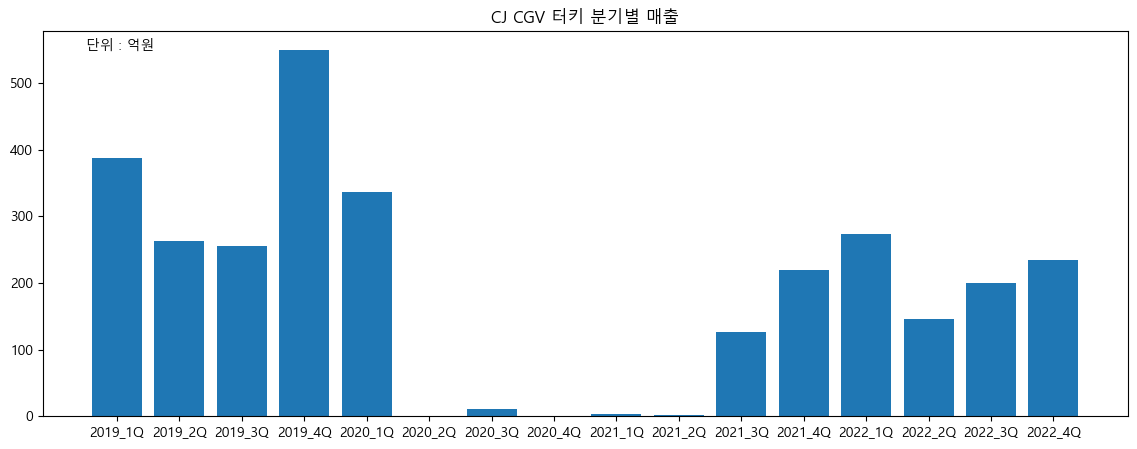

In [107]:
plt.figure(figsize = (14, 5))
plt.bar(tk.index, tk["rv"])
plt.title("CJ CGV 터키 분기별 매출")
plt.annotate("단위 : 억원", (-0.5, 550))

In [147]:
tk = tk.drop(["2020_2Q", "2020_3Q", "2020_4Q", "2021_1Q", "2021_2Q"])

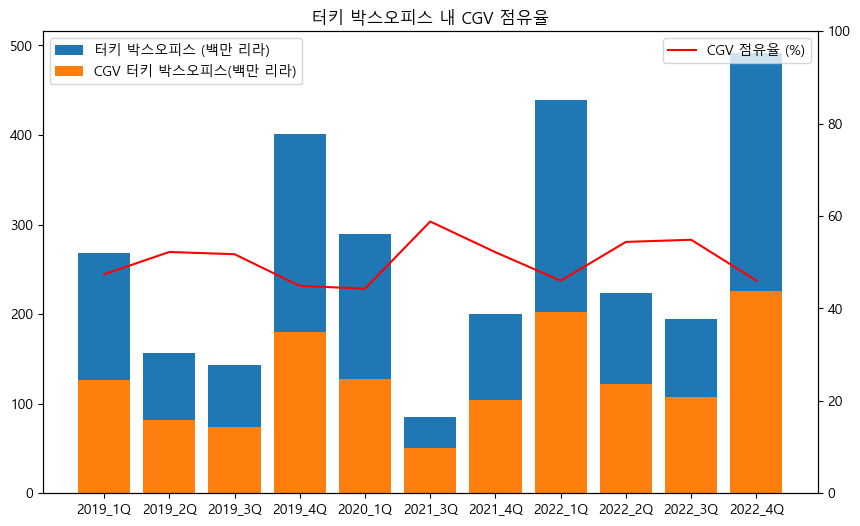

In [152]:
fig, ax1 = plt.subplots()
ax1.bar(tk.index, tk["tk_bo"], label ="터키 박스오피스 (백만 리라)")
ax1.bar(tk.index, tk["cgv_bo"], label = "CGV 터키 박스오피스(백만 리라)")
ax1.set_title("터키 박스오피스 내 CGV 점유율")
ax2=ax1.twinx()
ax2.plot(tk.index, tk["cgv_bo"]/tk["tk_bo"]*100, c ='red', label = "CGV 점유율 (%)")
ax2.set_ylim([0, 100])
fig.set_size_inches(10, 6)
ax1.legend()
ax2.legend()

Text(-0.5, 550, '단위 : 억원')

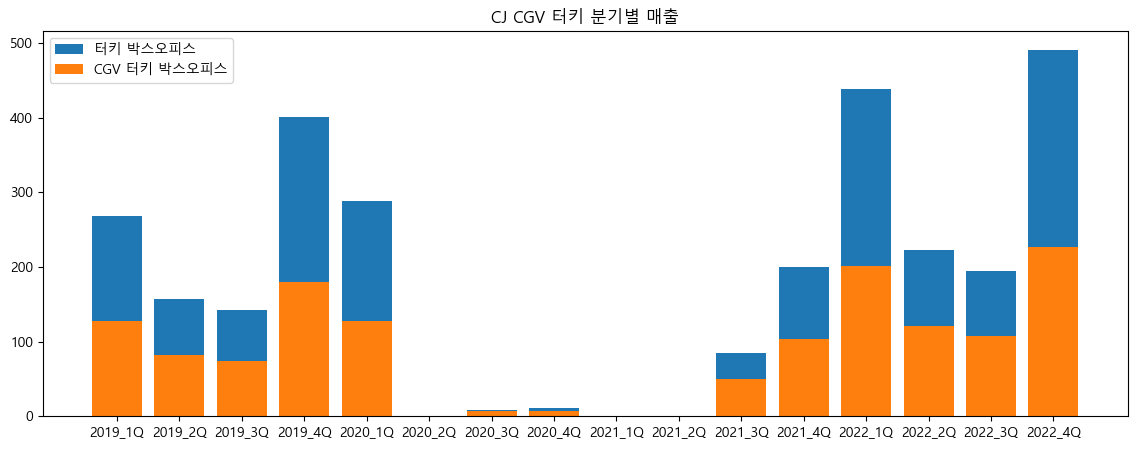

In [111]:
plt.figure(figsize = (14, 5))
plt.bar(tk.index, tk["tk_bo"], label ="터키 박스오피스")
plt.bar(tk.index, tk["cgv_bo"], label = "CGV 터키 박스오피스")
plt.title("CJ CGV 터키 분기별 매출")
plt.legend()
plt.annotate("단위 : 억원", (-0.5, 550))

### 리라 화 변수 추가

In [170]:
tk["lira"] = [69.51, 76.47, 75.38, 83.65, 89.33, 137.40, 130.13, 147.30, 141.85, 156.63, 177.26, 192.79, 201.06, 209.34, 201.91, 207.45][::-1]
tk["cgv_bo_won"] = tk["cgv_bo"] * tk["lira"]
tk["tk_bo_won"] = tk["tk_bo"] * tk["lira"]

## 2. 변수 간 상관관계 확인

### 3. 아웃라이어 제거하기

In [171]:
tk_new = tk.drop(["2020_2Q", "2020_3Q", "2020_4Q", "2021_1Q", "2021_2Q"])

In [172]:
tk_new

,rv,op,ebitda,site,screen,tk_bo,cgv_bo,atp,years,quaters,lira,cgv_bo_won,tk_bo_won
2019_1Q,387.0,23.0,102.0,107.0,909.0,268.0,127.0,13.8,2019,1,207.45,26346.150,55596.600
2019_2Q,263.0,-29.0,44.0,107.0,909.0,157.0,82.0,16.5,2019,2,201.91,16556.620,31699.870
2019_3Q,256.0,-50.0,27.0,107.0,906.0,143.0,74.0,17.6,2019,3,209.34,15491.160,29935.620
2019_4Q,550.0,136.0,207.0,108.0,913.0,401.0,180.0,16.2,2019,4,201.06,36190.800,80625.060
2020_1Q,337.0,5.0,75.0,108.0,913.0,289.0,128.0,16.5,2020,1,192.79,24677.120,55716.310
2021_3Q,127.0,-39.0,1.0,100.0,840.0,85.0,50.0,24.2,2021,3,137.40,6870.000,11679.000
2021_4Q,220.0,11.0,41.0,100.0,840.0,199.7,104.2,23.0,2021,4,89.33,9308.186,17839.201
2022_1Q,273.0,46.0,68.0,98.0,826.0,439.0,202.0,28.1,2022,1,83.65,16897.300,36722.350
2022_2Q,146.0,-23.0,-2.0,96.0,815.0,223.3,121.5,36.4,2022,2,75.38,9158.670,16832.354
2022_3Q,200.0,-67.0,52.0,92.0,788.0,195.0,107.0,45.6,2022,3,76.47,8182.290,14911.650


Text(0, 0.5, '터키 박스오피스 매출(억 원)')

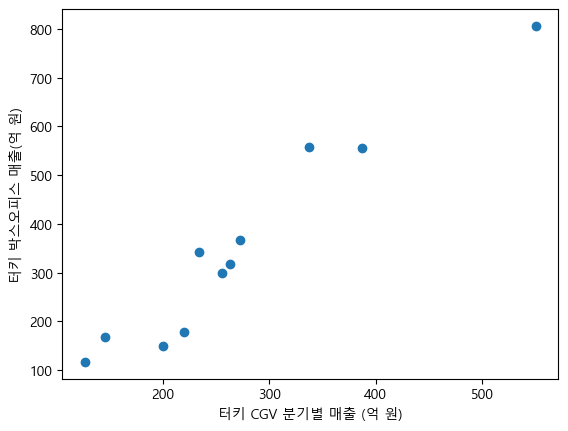

In [175]:
plt.scatter(tk_new["rv"], tk_new["tk_bo_won"]/100)
plt.xlabel("터키 CGV 분기별 매출 (억 원)")
plt.ylabel("터키 박스오피스 매출(억 원)")

In [176]:
np.corrcoef(tk_new["rv"], tk_new["tk_bo_won"])

array([[1.        , 0.96862339],
       [0.96862339, 1.        ]])

### CGV 매출과 박스오피스 확인하기

In [30]:
tk["year"] = tk.index.str.split('_').str[0]
tk.groupby("year").sum()

,rv,op,ebitda,site,screen,tk_bo,cgv_bo,atp,lira,cgv_bo_won,tk_bo_won
year,,,,,,,,,,,
2019,1456.0,80.0,380.0,429.0,3637.0,969.0,463.0,64.1,819.76,94584.730,197857.150
2020,348.0,-163.0,80.0,430.0,3636.0,309.0,142.0,50.7,668.53,26762.046,58680.418
2021,352.0,-111.0,55.0,410.0,3459.0,284.7,154.2,47.2,504.16,16178.186,29518.201
2022,853.0,-140.0,34.0,386.0,3200.0,1348.6,656.7,170.0,305.01,49961.422,102616.617


In [31]:
result = tk.groupby('year').agg({'site':'mean', 'screen':'mean', 'lira':'mean', 
                                 'rv':'sum', 'op':'sum', 'ebitda':'sum', 
                                 'tk_bo':'sum', 'cgv_bo':'sum', 
                                 'atp':'sum', 'cgv_bo_won':'sum', 
                                 'tk_bo_won':'sum'})
print(result)

        site  screen      lira      rv     op  ebitda   tk_bo  cgv_bo    atp  \
year                                                                           
2019  107.25  909.25  204.9400  1456.0   80.0   380.0   969.0   463.0   64.1   
2020  107.50  909.00  167.1325   348.0 -163.0    80.0   309.0   142.0   50.7   
2021  102.50  864.75  126.0400   352.0 -111.0    55.0   284.7   154.2   47.2   
2022   96.50  800.00   76.2525   853.0 -140.0    34.0  1348.6   656.7  170.0   

      cgv_bo_won   tk_bo_won  
year                          
2019   94584.730  197857.150  
2020   26762.046   58680.418  
2021   16178.186   29518.201  
2022   49961.422  102616.617  


## CGV IR 자료와 박스오피스 모조 데이터 비교하기

### 박스 오피스 모조 데이터 불러오기

In [ ]:
import requests as requests
from bs4 import BeautifulSoup

url = "https://www.boxofficemojo.com/year/?area=TR"
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('table')

rows = table.find_all('tr')
data = []
for row in rows[1:] : # 첫 행이 비어있으므로
    row_data = row.find_all("td")
    row = [cell.text for cell in row_data]
    data.append(row)

headers = table.find_all('th')
column_names = [header.text for header in headers]

df = pd.DataFrame(data)
df.columns = column_names

df["Total Gross"] = df["Total Gross"].str.replace('$' ,"").str.replace(',', "")
df["Average"] = df["Average"].str.replace('$' ,"").str.replace(',', "")

df["Average"] = df["Average"].astype(int)
df["Year"] = pd.to_datetime(df["Year"], format = "%Y")

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_11740\3307286764.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Total Gross"] = df["Total Gross"].str.replace('$' ,"").str.replace(',', "")
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_11740\3307286764.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average"] = df["Average"].str.replace('$' ,"").str.replace(',', "")


In [ ]:
df["Total Gross"] = df["Total Gross"].astype(int)
df = df.set_index('Year')
df = df.sort_values(by = "Year")
print(df)

            Total Gross    %± LY Releases  Average  \
Year                                                 
2002-01-01     25222960        -       80   315287   
2003-01-01     73120979  +189.9%      136   537654   
2004-01-01    115774333   +58.3%      132   877078   
2005-01-01    125434781    +8.3%      138   908947   
2006-01-01    151932513   +21.1%      172   883328   
2007-01-01    182979491   +20.4%      301   607905   
2008-01-01    228144925   +24.7%      326   699831   
2009-01-01    189412970     -17%      312   607092   
2010-01-01    395780391    +109%      312  1268526   
2011-01-01    232006061   -41.4%      338   686408   
2012-01-01    258927238   +11.6%      345   750513   
2013-01-01    248676065      -4%      346   718716   
2014-01-01    256469748    +3.1%      297   863534   
2015-01-01    208444598   -18.7%      324   643347   
2016-01-01    212337060    +1.9%      404   525586   
2017-01-01    223902914    +5.4%      424   528072   
2018-01-01    180649098   -1

### CGV IR 실적과 박스오피스 모조의 데이터 간의 상관계수 확인

In [ ]:
import numpy as np

x = result["tk_bo_won"]
y = df.loc["2019-01-01" :"2022-01-01"]['Total Gross']
np.corrcoef(x.tolist(), y.tolist()) # corr = 0.9985

array([[1.        , 0.99856468],
       [0.99856468, 1.        ]])

In [ ]:
x = result["rv"]
y = df.loc["2019-01-01" :"2022-01-01"]['Total Gross']
np.corrcoef(x.tolist(), y.tolist()) # corr = 0.9985

array([[1.        , 0.98315826],
       [0.98315826, 1.        ]])

## 2023년 1분기 매출 계산하기

### 2023년 1분기 터키 박스오피스 가져오기

In [ ]:
import requests as requests
from bs4 import BeautifulSoup
url = "https://www.boxofficemojo.com/weekend/by-year/?area=TR"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
rows = table.find_all('tr')
data = []
for row in rows :
    row_data = row.find_all('td')
    row = [cell.text for cell in row_data]
    data.append(row)

headers = table.find_all('th')
column_names = [header.text for header in headers]

mojo_2023 = pd.DataFrame(data)
mojo_2023.columns = column_names
mojo_2023 = mojo_2023[1:]

In [ ]:
mojo_2023["start_date"] = mojo_2023["Dates"].str.split("-").str[0]
mojo_2023['start_date'] = pd.to_datetime(mojo_2023['start_date'], format='%b %d')
mojo_2023["start_date"] = mojo_2023["start_date"].apply(lambda x : x.replace(year=2023))

In [ ]:
mojo_2023.set_index("start_date", inplace = True)

In [ ]:
mojo_2023_1q = mojo_2023["2023-01-01" : "2023-03-31"]
mojo_2023_1q["Overall Gross"] = mojo_2023_1q["Overall Gross"].str.replace("$","").str.replace(",","")
mojo_2023_1q["Overall Gross"] =mojo_2023_1q["Overall Gross"].astype(int)

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_11740\356041989.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mojo_2023_1q = mojo_2023["2023-01-01" : "2023-03-31"]
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_11740\356041989.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mojo_2023_1q["Overall Gross"] = mojo_2023_1q["Overall Gross"].str.replace("$","").str.replace(",","")
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_11740\356041989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [ ]:
mojo_2023_1q

,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW,Releases,#1 Release\n,Genre\n,Budget\n,Running Time\n,Week,Long Weekend\n
start_date,,,,,,,,,,,,
2023-03-31,Mar 31-Apr 2,"$962,279",-21.9%,1015017,-20.2%,41,John Wick: Chapter 4,-,-,-,13,false
2023-03-24,Mar 24-26,"$1,232,439",+55.1%,1271406,+38.8%,40,John Wick: Chapter 4,-,-,-,12,false
2023-03-17,Mar 17-19,"$794,702",+23.5%,915822,+24.8%,45,Shazam! Fury of the Gods,-,-,-,11,false
2023-03-10,Mar 10-12,"$643,564",-23.6%,734046,-21%,44,Ant-Man and the Wasp: Quantumania,-,-,-,10,false
2023-03-03,Mar 3-5,"$841,882",-19.8%,928837,-18%,39,Ant-Man and the Wasp: Quantumania,-,-,-,9,false
2023-02-24,Feb 24-26,"$1,049,508",+1%,1132809,+1.5%,35,Ant-Man and the Wasp: Quantumania,-,-,-,8,false
2023-02-17,Feb 17-19,"$1,038,677",+6.7%,1116484,+9.1%,33,Puss in Boots: The Last Wish,-,-,-,7,false
2023-02-10,Feb 10-12,"$973,579",-59.8%,1023213,-59.9%,30,Puss in Boots: The Last Wish,-,-,-,6,false
2023-02-03,Feb 3-5,"$2,419,915",-17.2%,2550548,-16.4%,33,Rafadan Tayfa Galaktik Tayfa,-,-,-,5,false


In [ ]:
mojo_2023_1q["Overall Gross"].sum() # 1분기 6억 9000리라 , 1리라는 70원

22043055

In [191]:
from sklearn.linear_model import LinearRegression

x = tk_new[["tk_bo_won"]]/100
y= tk_new[["rv"]]

model = LinearRegression()
model.fit(x, y)
print(model.predict([[469]]))

[[335.9986058]]


c:\Users\HwijunKwon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [178]:
tk_new["year"]= tk_new["year"].astype(int)

KeyError: 'year'

In [183]:
tk_new

,rv,op,ebitda,site,screen,tk_bo,cgv_bo,atp,years,quaters,lira,cgv_bo_won,tk_bo_won
2019_1Q,387.0,23.0,102.0,107.0,909.0,268.0,127.0,13.8,2019,1,207.45,26346.150,55596.600
2019_2Q,263.0,-29.0,44.0,107.0,909.0,157.0,82.0,16.5,2019,2,201.91,16556.620,31699.870
2019_3Q,256.0,-50.0,27.0,107.0,906.0,143.0,74.0,17.6,2019,3,209.34,15491.160,29935.620
2019_4Q,550.0,136.0,207.0,108.0,913.0,401.0,180.0,16.2,2019,4,201.06,36190.800,80625.060
2020_1Q,337.0,5.0,75.0,108.0,913.0,289.0,128.0,16.5,2020,1,192.79,24677.120,55716.310
2021_3Q,127.0,-39.0,1.0,100.0,840.0,85.0,50.0,24.2,2021,3,137.40,6870.000,11679.000
2021_4Q,220.0,11.0,41.0,100.0,840.0,199.7,104.2,23.0,2021,4,89.33,9308.186,17839.201
2022_1Q,273.0,46.0,68.0,98.0,826.0,439.0,202.0,28.1,2022,1,83.65,16897.300,36722.350
2022_2Q,146.0,-23.0,-2.0,96.0,815.0,223.3,121.5,36.4,2022,2,75.38,9158.670,16832.354
2022_3Q,200.0,-67.0,52.0,92.0,788.0,195.0,107.0,45.6,2022,3,76.47,8182.290,14911.650


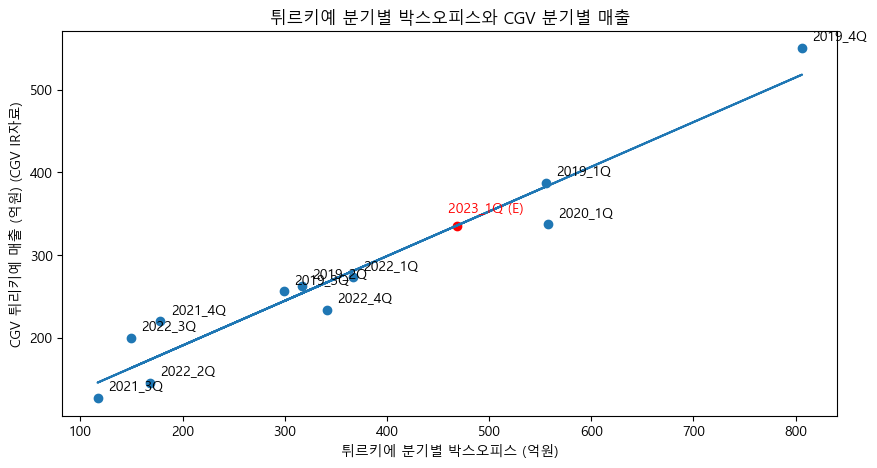

In [197]:
plt.figure(figsize=(10, 5))
plt.scatter(tk_new["tk_bo_won"]/100, tk_new["rv"])
plt.plot(x, x*model.coef_+model.intercept_ )
for i, txt in enumerate(tk_new.index.tolist()):
    plt.annotate(txt, (tk_new["tk_bo_won"][i]/100+10, tk_new["rv"][i]+10))

plt.scatter(469, 335, c = "red")
plt.title("튀르키예 분기별 박스오피스와 CGV 분기별 매출")
plt.xlabel("튀르키에 분기별 박스오피스 (억원)")
plt.ylabel("CGV 튀리키예 매출 (억원) (CGV IR자료)")
plt.annotate("2023_1Q (E)", (460, 331+20), c = "red")

plt.show() 

In [182]:
tk_new.index

Index(['2019_1Q', '2019_2Q', '2019_3Q', '2019_4Q', '2020_1Q', '2021_3Q',
       '2021_4Q', '2022_1Q', '2022_2Q', '2022_3Q', '2022_4Q'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


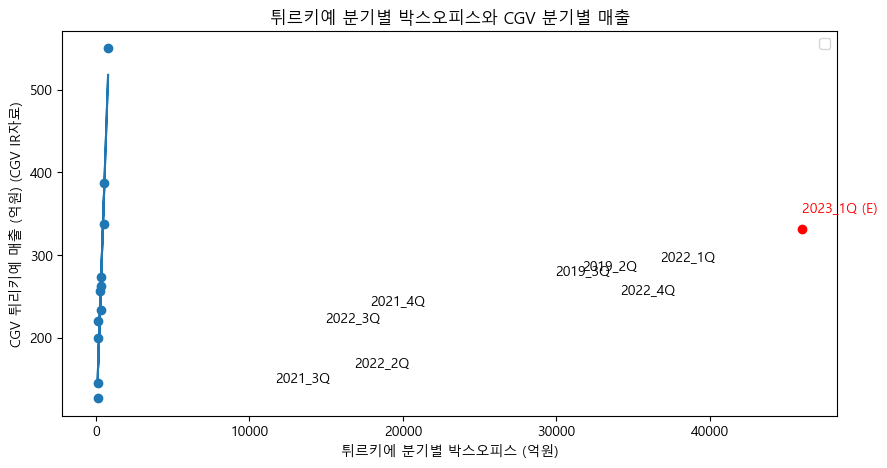

In [194]:
plt.figure(figsize=(10, 5))
plt.scatter(tk_new["tk_bo_won"]/100, tk_new["rv"])
plt.plot(x, x*model.coef_+model.intercept_ )
for i, txt in enumerate(tk_new.index.tolist()):
    plt.annotate(txt, (tk_new["tk_bo_won"][i]+10, tk_new["rv"][i]+20))


plt.scatter(46000, 331, c = "red")
plt.title("튀르키예 분기별 박스오피스와 CGV 분기별 매출")
plt.xlabel("튀르키에 분기별 박스오피스 (억원)")
plt.ylabel("CGV 튀리키예 매출 (억원) (CGV IR자료)")
plt.legend()
plt.annotate("2023_1Q (E)", (46000, 331+20), c = "red")

plt.show() 